## I denna kodcell placeras modulimporter och egendefinerade funktioner som används i flera deluppgifter

In [2]:
#Importerar moduler
import csv
import matplotlib.pyplot as plt

#Funktion som omvandlar CSV fil till en lista av listor som innehåller raderna i CSV filen
def read_file(file_name):
    with open(file_name, "r", encoding="utf-8") as csv_file:
        dataset = []
        csv_reader = csv.reader(csv_file, delimiter=";")
        for line in csv_reader:
            dataset.append(line)
    return dataset

#Funktion som skriver ut de 3 första raderna
def print_3_first_row(data):
    for i in range(0,3,1):
        print(data[i])


#En funktion som hämtar användare input och kontrollerar den så att man inte kan ge fel input
def get_year_input():
    while True:
        år = input("Välj ett år mellan 2018-2023: ")
        if år in ["2018", "2019", "2020", "2021", "2022", "2023"]:
            return år
        else:
            print("Fel inmatning var vänlig ange ett år mellan 2018-2023")

#Samma som funktionen ovan fast för prisområde
def get_prisområde():
    while True:
        prisområde = input("Välj ett prisområde mellan 1-4 :")
        if prisområde in ["1", "2", "3", "4"]:
            return prisområde
        else:
            print("Fel prisområde ange ett nummer mellan 1-4")

#Samma som funktionen ovan fast för Villa eller lägenhetskund
def get_customer_input():
    while True:
        customer = input("Lägenhetskund (L) eller villakund (V)? : ")
        if customer in ["V", "L", "v", "l"]:
            return customer
        else:
            print("Fel inmatning skriv V eller L")

#Samma som funktionen ovan fast för prisavtal
def get_prisavtal():
    while True:
        prisvatal = input("Ange prisavtal (R, F1, F3)")
        if prisvatal in ["R", "r", "F1", "f1", "F3", "f3"]:
            return prisvatal.upper()
        else:
            print("Fel inmatning skriv något av R, F1, F3")

#Funktion som räknar ut avrage
def calculate_avg(column_index, data):
    #Skapar en tom lista för att fylla med värden som genomsnitt ska beräknas på.
    list_of_column_values = []
    #Lägger in datan efter vilket column index som är inlagt.
    for line in data:
        list_of_column_values.append(line[column_index])

    #Skapar en variabel som håller totala värdet av alla värden fetrsom det behövs för beräkningen
    sum_lista_float = 0
    #Summerar alla värden i list_of_column_values och lägger totalen i sum_lista_float. Omformaterar till float också
    for i in list_of_column_values:
        sum_lista_float =  float(i) + sum_lista_float

    #Beräknar antale object i listan med funktionen len
    objects_in_lis = len(list_of_column_values)

    #Gör beräkningen summa/antal
    avg = sum_lista_float / objects_in_lis

    #Avrundar resultatet till 2 decimaler
    avg_rounded = round(avg, 2)
    #Retunerar genomsnittet
    return avg_rounded


#Funktion som beräknar min och max värden samt vilken månad värden var.
#Funktion retunerar värden i en två dimensionell lista på följande sätt.
#[[min_value, max_value],[min_month, max_month]]
def get_min_max_value(column_index, data):
    #Skapar en tom lista för att fylla med värden som genomsnitt ska beräknas på.
    list_of_column_values = []
    for line in data:
        #Lägger in datan efter vilket column index som är inlagt. Omformaterar till float också.
        list_of_column_values.append(float(line[column_index]))
    #Sorterar datan i storleks ordning
    sorted_dataset = sorted(list_of_column_values)
    #Hämtar det första värdet genom index 0 och sätter till variabeln min
    min = sorted_dataset[0]
    #Hämtar det sista värdet genom index -1 och sätter till variabeln max
    max = sorted_dataset[-1]
    #Lägger in värderna i en lista
    min_max_value = []
    min_max_value.append(min)
    min_max_value.append(max)

    #Hämtar månaden för min värdet
    min_max_month = []
    #Går igenom datan och hittar vart värdet förekommer
    for line in data:
        if line[column_index] == str(min):
            #Där värdet förekommer tar den månaden och lägger till i listan
            min_max_month.append(line[1][:3])

    #Utför ssamma procedur som ovan fast för max värdet
    for line in data:
        if line[column_index] == str(max):
            min_max_month.append(line[1][:3])

    #Hämtar året för min värdet
    min_max_year = []
    #Går igenom datan och hittar vart värdet förekommer
    for line in data:
        if line[column_index] == str(min):
            #Där värdet förekommer tar den månaden och lägger till i listan
            min_max_year.append(line[0])

    #Utför ssamma procedur som ovan fast för max värdet
    for line in data:
        if line[column_index] == str(max):
            min_max_year.append(line[0])

    #Slår ihop listorna till en
    min_max = [min_max_value, min_max_month, min_max_year]
    #Retunerar den ihopslagna listan
    return min_max   

## Deluppgift 1
Ev. kommentar:

In [3]:
def main_deluppgift1():
    #Använder den tidigare funktionen för att ange listorna till lokala variabler som kan anävndas
    lghData = read_file("lghpriser.csv")
    villaData = read_file("villapriser.csv")


    #Skriver ut de tre första raderna
    print("Lägenhets Priser:")
    print_3_first_row(lghData)
    print("")
    print("Villa Priser:")
    print_3_first_row(villaData)
    print("")

main_deluppgift1()

Lägenhets Priser:
['Ar', 'manad', 'SE1-Fast pris 1 ar', 'SE1-Fast pris 3 ar', 'SE1-Rorligt pris', 'SE2-Fast pris 1 ar', 'SE2-Fast pris 3 ar', 'SE2-Rorligt pris', 'SE3-Fast pris 1 ar', 'SE3-Fast pris 3 ar', 'SE3-Rorligt pris', 'SE4-Fast pris 1 ar', 'SE4-Fast pris 3 ar', 'SE4-Rorligt pris']
['2018', 'januari', '64.12', '63.98', '67.81', '63.87', '63.76', '67.92', '64.95', '65.31', '68.28', '66.07', '66.34', '69.38']
['2018', 'februari', '66.01', '64.29', '77.14', '65.82', '63.96', '77.42', '67.04', '65.54', '77.96', '68.02', '66.58', '78.91']

Villa Priser:
['Ar', 'Manad', 'SE1-Fast pris 1 ar', 'SE1-Fast pris 3 ar', 'SE1-Rorligt pris', 'SE2-Fast pris 1 ar', 'SE2-Fast pris 3 ar', 'SE2-Rorligt pris', 'SE3-Fast pris 1 ar', 'SE3-Fast pris 3 ar', 'SE3-Rorligt pris', 'SE4-Fast pris 1 ar', 'SE4-Fast pris 3 ar', 'SE4-Rorligt pris']
['2018', 'januari', '49.39', '48.71', '50.4', '49.4', '48.7', '50.59', '50.49', '50.17', '50.81', '51.82', '51.17', '51.81']
['2018', 'februari', '51.23', '48.99', '6

## Deluppgift 2
Ev. kommentar:

1


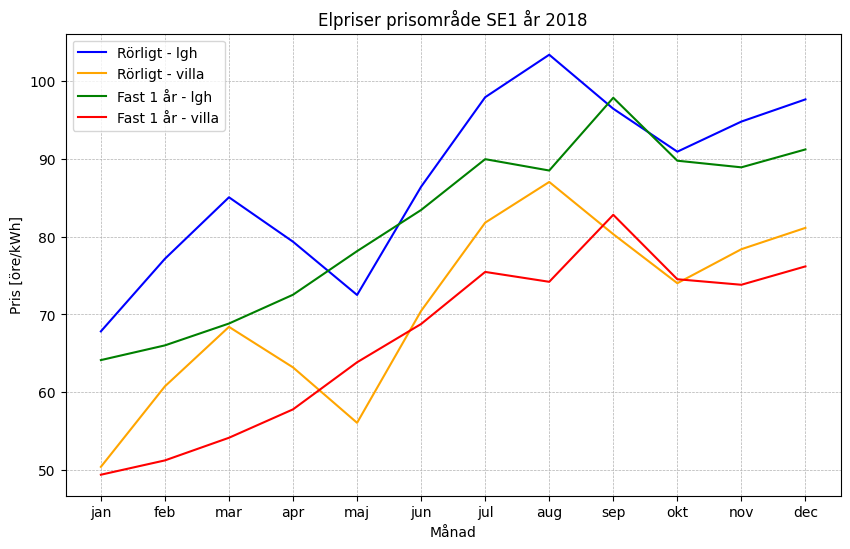

In [4]:
lghData = read_file("lghpriser.csv")
villaData = read_file("villapriser.csv")

#Huvudfunktion för deluppgiften
def main_deluppgift2(lghData, villaData):

    #Definerar värderna på x-axeln eftersom de är statiska oberoende av kund/användare val
    x_months = ["jan", "feb", "mar", "apr", "maj", "jun", "jul", "aug", "sep", "okt", "nov", "dec"]

    #Hämtar user input
    år = get_year_input()
    prisområde = get_prisområde()

    #Andvänder denna för att omvandla valet av prisområde till det index jag behöver i datan
    if prisområde == "1":
        Fast_index = 2
        Rör_index = 4
        print(1)
    elif prisområde == "2":
        Fast_index = 5
        Rör_index = 7
        print(2)
    elif prisområde == "3":
        Fast_index = 8
        Rör_index = 10
        print(3)
    else:
        Fast_index = 11
        Rör_index = 13
        print(4)

    #Splittar datan för villa samt lägenhet och tar ut endast den data som är för det valada året.
    year_list_lgh = []
    for line in lghData:
        if line[0] == år:
            year_list_lgh.append(line)

    year_list_villa = []
    for line in villaData:
        if line[0] == år:
            year_list_villa.append(line)

    #Skapar två listor för alla värderna så att de kan användas i grafen
    rörligt_lägenhet = []
    fast_lägenhet = []
    for line in year_list_lgh:
        rörligt_lägenhet.append(float(line[Rör_index]))
        fast_lägenhet.append(float(line[Fast_index]))

    rörligt_villa = []
    fast_villa = []
    for line in year_list_villa:
        rörligt_villa.append(float(line[Rör_index]))
        fast_villa.append(float(line[Fast_index]))

    #Skapar grafen nedan

    #Sätter grafens storlek
    plt.figure(figsize=(10, 6))
    
    #Matar in datan
    plt.plot(x_months, rörligt_lägenhet, label="Rörligt - lgh", color="blue")
    plt.plot(x_months, rörligt_villa, label="Rörligt - villa", color="orange")

    plt.plot(x_months, fast_lägenhet, label="Fast 1 år - lgh", color="green")
    plt.plot(x_months, fast_villa, label="Fast 1 år - villa", color="red")

    # Lägger till titlar och ettiketter
    plt.title(f"Elpriser prisområde SE{prisområde} år {år}")
    plt.xlabel("Månad")
    plt.ylabel("Pris [öre/kWh]")
    plt.legend(loc="upper left")
    plt.grid(True, which="both", linestyle="--", linewidth=0.5)  # Adding grid lines

    #Visar graf
    plt.show()

main_deluppgift2(lghData, villaData)


## Deluppgift 3
Ev. kommentar:


                        Analys av elpriserna för kategorin lägenhetskund år 2022                         

              rörligt pris (öre/kWh)                              fast pris 3 år (öre/kWh)           
Prisomr.  min -- (mån) max -- (mån)  medel    median        min -- (mån)  max -- (mån)  medel  median
-------------------------------------------------------------------------------------------------------
SE1       61.70  jul  303.96  dec    117.70   99.08          89.75  feb   324.10  dec   191.95  150.99
SE2       61.12  jul  305.86  dec    121.58  100.95          88.93  feb   325.57  dec   192.15  151.11
SE3      129.24  feb  394.88  dec    212.83  178.76         107.16  feb   400.28  sep   236.22  191.18
SE4      137.61  feb  426.37  aug    242.12  217.04         174.02  jan   590.57  sep   351.43  298.72


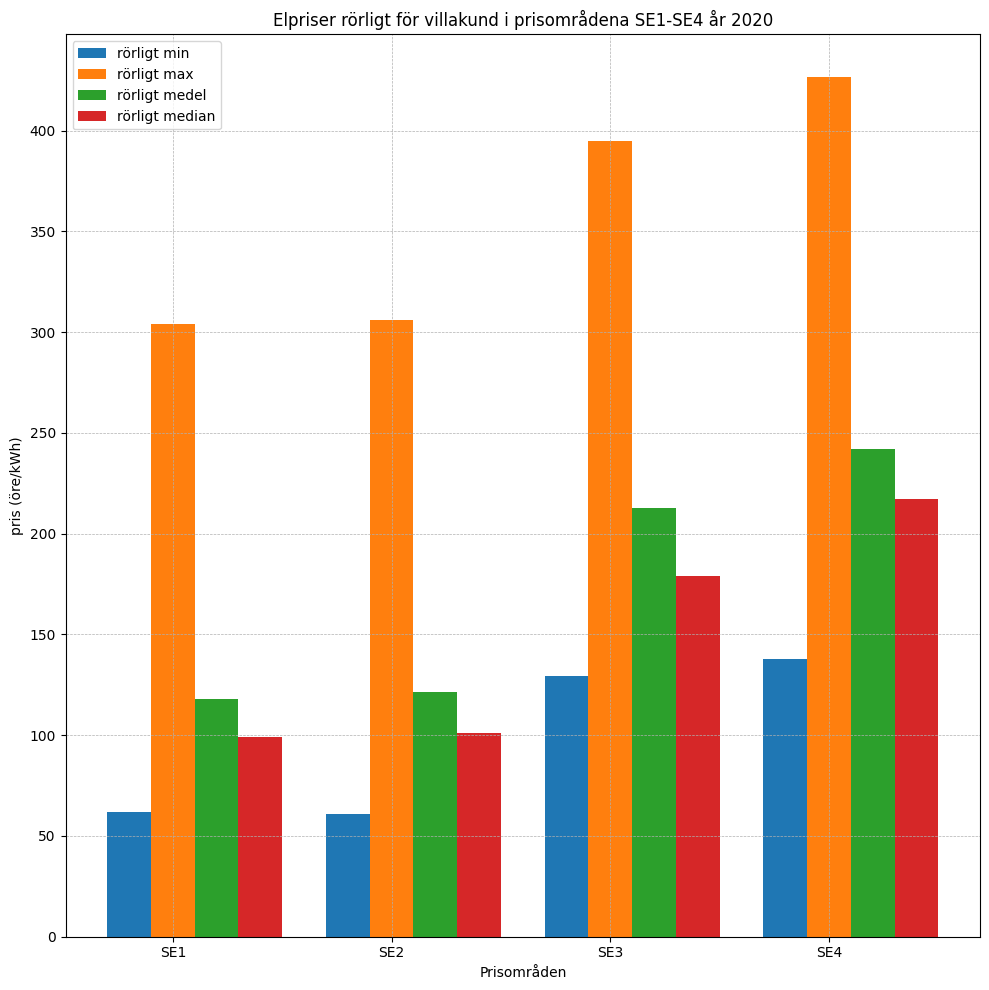

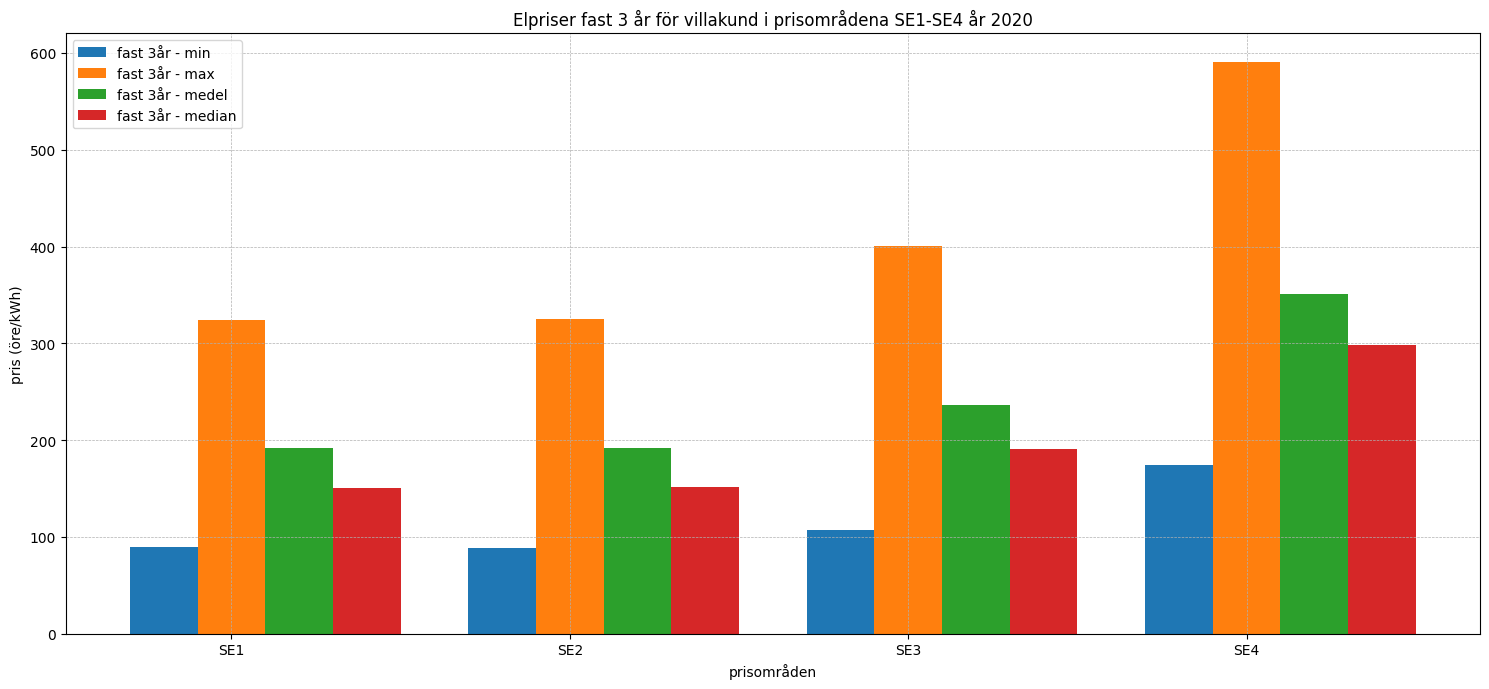

In [125]:
#Läser in datan
lghData = read_file("lghpriser.csv")
villaData = read_file("villapriser.csv")

#Funktion som beräknar medianen
def calculate_median(column_index, data):
    #Skapar en tom lista för att fylla med värden som genomsnitt ska beräknas på.
    list_of_column_values = []

    #Lägger in datan efter vilket column index som är inlagt. Omformaterar till float också
    for line in data:
        list_of_column_values.append(float(line[column_index]))

    #Sorterar datan i storleksordning
    sorted_dataset = sorted(list_of_column_values)

    #Räknar antal tal som finns med i datan
    object_count = len(sorted_dataset)

    #Kollar om datan är ett ojämnt antal
    if object_count % 2 == 1:
        #Om det är ett omjänt antal kan jag ta mittersta talet i den sorterade listan.
        #Detta gör jag genom att ta antalet object i listan delat på två avrundat nedåt som index.
        #Detta funkar eftersom index börjar på 0.
        #Exempel om det finns 5 tal sorterade så vill jag ha talet som finns på 3dje plats (index 2).
        #Om jag tar 5//2 (avrundat nedåt genom dubbel //) får jag 2 vilket är samma som indexet
        #Därav object_count//2
        median = sorted_dataset[object_count//2]
    
    #Om det är jämnt beräknar jag medelvärdet av de två centrerade värderna.
    else:
        first_value = sorted_dataset[object_count//2-1]
        second_value = sorted_dataset[object_count//2]
        median = (first_value + second_value) / 2
    
    #Avrundar median till två decimaler
    median_rounded = round(median, 2)
    #Retunerar avrundad median
    return median_rounded


#Huvudfunktionen för deluppgift 3 
def main_deluppgift3():

    #Hämtar kund inmatning
    customer_input = get_customer_input ()
    år = get_year_input ()

    #Skär ner datan till det relevanta året för lägenhet
    year_list_lgh = []
    for line in lghData:
        if line[0] == år:
            year_list_lgh.append(line)

    #Skär ner datan till det relevanta året för lägenhet
    year_list_villa = []
    for line in villaData:
        if line[0] == år:
            year_list_villa.append(line)

    #Beroende på customer input definerar vi variabeln data till den korrekta datan.
    #Vi definerar även en string så att den kan skrvias ut i rubriken
    if customer_input in ["V", "v"]:
        data = year_list_villa
        kund = "villakund"
    else:
        data = year_list_lgh
        kund = "lägenhetskund"

    #Skapar en lista med index av kolumnerna för fast och rörligt pris.
    rör_index_SE1_SE4 = [4, 7, 10, 13]

    fast_index_SE1_SE4 = [3, 6, 9, 12]

    #Skapar 3 listor för att spara de utmatade värderna.
    rör_min_max_values = []
    rör_avg_values = []
    rör_median_values = []
    #Gör en for loop för att gå igenom alla kolumner och skapa min, max, medelvärde och median för varje kolumn.
    for column_index in rör_index_SE1_SE4:
        rör_min_max_values.append(get_min_max_value(column_index, data))
        rör_avg_values.append(calculate_avg(column_index, data))
        rör_median_values.append(calculate_median(column_index, data))

    fast_min_max_values = []
    fast_avg_values = []
    fast_median_values = []
    for column_index in fast_index_SE1_SE4:
        fast_min_max_values.append(get_min_max_value(column_index, data))
        fast_avg_values.append(calculate_avg(column_index, data))
        fast_median_values.append(calculate_median(column_index, data))

    #Definerar prisområden som används för for loopen nedan samt i grafen.
    prisområden = ["SE1", "SE2", "SE3", "SE4"]

    #Printar ut designen
    print("=======================================================================================================")
    print("")
    print(f"                        Analys av elpriserna för kategorin {kund:<9} år {år}                         ")
    print("")
    print("              rörligt pris (öre/kWh)                              fast pris 3 år (öre/kWh)           ")
    print("Prisomr.  min -- (mån) max -- (mån)  medel    median        min -- (mån)  max -- (mån)  medel  median")
    print("-------------------------------------------------------------------------------------------------------")

    #Gör en for loop som printar varje rad med data
    for index, prisområde in enumerate(prisområden):
        print(f"{prisområde:<6}   {rör_min_max_values[index][0][0]:>6.2f}  {rör_min_max_values[index][1][0]:<4} {rör_min_max_values[index][0][1]:>6.2f}  {rör_min_max_values[index][1][1]:<4}   {rör_avg_values[index]:>6.2f}  {rör_median_values[index]:>6.2f}         {fast_min_max_values[index][0][0]:>6.2f}  {fast_min_max_values[index][1][0]:<4}  {fast_min_max_values[index][0][1]:>6.2f}  {fast_min_max_values[index][1][1]:<4}  {fast_avg_values[index]:>6.2f}  {fast_median_values[index]:>6.2f}")

    print("=======================================================================================================")


    #Skapar en dictionary med alla värden kopplat till Key från vad de är
    rörligt_values = {
        "rörligt min": tuple(val[0][0] for val in rör_min_max_values),
        "rörligt max": tuple(val[0][1] for val in rör_min_max_values),
        "rörligt medel" : (rör_avg_values),
        "rörligt median" : (rör_median_values)
    }

    #Gör samma fast för den andra grafen
    fast_values = {
        "fast 3år - min" : tuple(val[0][0] for val in fast_min_max_values),
        "fast 3år - max" : tuple(val[0][1] for val in fast_min_max_values),
        "fast 3år - medel" : (fast_avg_values),
        "fast 3år - median" : (fast_median_values)
    }

    #Skapar diagramet
    #Skapar en lista med längden av prisområde som ser ut följande
    range = [0, 1, 2, 3]

    #Definerar bredden av staplarna
    bar_width = 0.2

    #Definerar storleken av diagrammet
    plt.figure(figsize=(10,10))

    #Koden nedan loopar igenom varje nyckel-värde par i rörligt_values
    #Enumerate() funktion används för att hämta både index och själva nyckelvärdeparet.
    for idx, (key, value) in enumerate(rörligt_values.items()):
        positions_shifted = [p + idx*bar_width for p in range]
        plt.bar(positions_shifted, value, width=bar_width, label=key)

    #Sätter titlar, ticks, legend och ettiketter på stapeldiagrammet
    plt.xlabel("Prisområden")
    plt.ylabel("pris (öre/kWh)")
    plt.title("Elpriser rörligt för villakund i prisområdena SE1-SE4 år 2020")
    plt.xticks([num + bar_width for num in range], prisområden)
    plt.legend(loc="upper left")
    plt.grid(True, which="both", linestyle="--", linewidth=0.5)  # Adding grid lines

    #Justerar layouten och visar diagrammet
    plt.tight_layout()
    plt.show()

    #Definerar storleken av diagrammet
    plt.figure(figsize=(15,7))

    #Skapar en stapel för varje nyckel-värde par i rörligt_values
    for idx, (key, value) in enumerate(fast_values.items()):
        positions_shifted = [p + idx*bar_width for p in range]
        plt.bar(positions_shifted, value, width=bar_width, label=key)
    
    #Sätter titlar, ticks, legend och ettiketter på stapeldiagrammet
    plt.xlabel("prisområden")
    plt.ylabel("pris (öre/kWh)")
    plt.title("Elpriser fast 3 år för villakund i prisområdena SE1-SE4 år 2020")
    plt.xticks([num + bar_width for num in range], prisområden)
    plt.legend(loc="upper left")
    plt.grid(True, which="both", linestyle="--", linewidth=0.5)
    
    #Justerar layouten och visar diagrammet
    plt.tight_layout()
    plt.show()
    
#Kör funktionen
main_deluppgift3()




## Deluppgift 4
Ev. kommentar:

[-60.68, -22.07, 6.13, 11.72, -44.21, 39.36, -24.76]


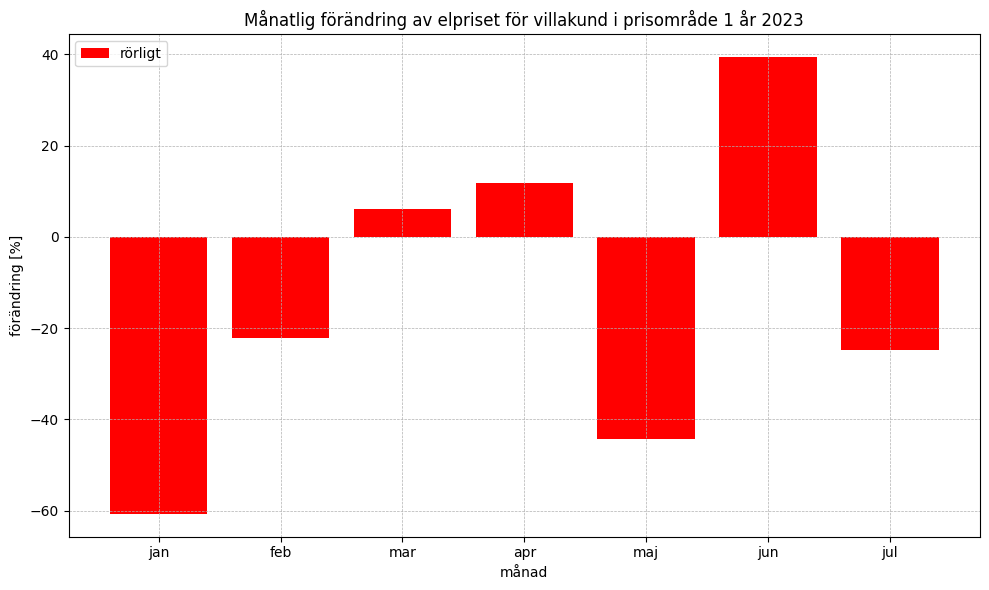

In [9]:
#Hämtar datan
lghData = read_file("lghpriser.csv")
villaData = read_file("villapriser.csv")

#Definerar en funktion som tar in data och ger tillbaka ff för varje månad.
def calculate_ff(data):
    #Skapar en lista att spara datan i
    ff_permonth = []
    #En foor loop som startar på 1 i index eftersom de första värdet i data är från tidigare året.
    for i, value in enumerate(data[1:], start=1):
        #Den försöker först
        try:
            #Här funktionen given i uppgiften med variablrna
            ff = ((value - data[i-1])/ data[i-1]) * 100
            ff = round(ff, 2)
            ff_permonth.append(ff)
        except:
            #Om den inte lyckas hitta ett tidigare värde ecempelvis så hoppar den till nästa.
            pass
    return ff_permonth


def main_deluppgift4 ():
    #Hämtar kund input
    customer = get_customer_input()
    prisavtal = get_prisavtal()
    prisområde = get_prisområde()
    år = get_year_input()
    
    #Splittar datan för villa samt lägenhet och tar ut endast den data som är för det valada året.
    previous_year = int(år) - 1
    year_list_lgh = []
    year_list_villa = []
    for line in lghData:
        if line[0] == str(previous_year) and line[1] == "december":
            year_list_lgh.append(line)
        elif line[0] == år:
            year_list_lgh.append(line)

    for line in villaData:
        if line[0] == str(previous_year) and line[1] == "december":
            year_list_villa.append(line)
        elif line[0] == år:
            year_list_villa.append(line)


    #Beroende på customer input definerar vi variabeln data till den korrekta datan.
    #Vi definerar även en string så att den kan skrvias ut i rubriken
    if customer.lower()=="v":
        data = year_list_villa
        kund = "villakund"
    else:
        data = year_list_lgh
        kund = "lägenhetskund"

    #Definerar en mapping för de val en kund kan gör och vad den kombinationen leder till för kolumn.
    column_mapping = {
        ("1", "F1"): 2,
        ("1", "F3"): 3,
        ("1", "R"): 4,
        ("2", "F1"): 5,
        ("2", "F3"): 6,
        ("2", "R"): 7,
        ("3", "F1"): 8,
        ("3", "F3"): 9,
        ("3", "R"): 10,
        ("4", "F1"): 11,
        ("4", "F3"): 12,
        ("4", "R"): 13
    }

    #Hämtar den rätta column indexen
    column_index = column_mapping.get((prisområde, prisavtal))

    #Processar datan till enbart relevanta värden
    values_data = []
    for line in data:
        values_data.append(float(line[column_index]))

    #Kallar på funktion och hämtar ff
    ff_data = calculate_ff(values_data)

    print(ff_data)
    #Bestämmer x beroende på mängden data vi får tillbaka
    if len(ff_data) == 11:
        #Definerar värderna på x-axeln eftersom de är statiska oberoende av kund/användare val
        x_values = ["feb", "mar", "apr", "maj", "jun", "jul", "aug", "sep", "okt", "nov", "dec"]
    elif len(ff_data) < 11:
        x_values = ["jan", "feb", "mar", "apr", "maj", "jun", "jul"]
    else:
        #Definerar värderna på x-axeln eftersom de är statiska oberoende av kund/användare val
        x_values = ["jan", "feb", "mar", "apr", "maj", "jun", "jul", "aug", "sep", "okt", "nov", "dec"]

    #Plottar diagrammet.
    plt.figure(figsize=(10,6))

    plt.bar(x_values, ff_data, color="red", label="rörligt")
    plt.title(f"Månatlig förändring av elpriset för {kund} i prisområde {prisområde} år {år}")
    plt.xlabel("månad")
    plt.ylabel("förändring [%]")
    plt.grid(True, which="both", linestyle="--", linewidth=0.5)
    plt.legend(loc="upper left")
    plt.tight_layout()
    plt.show()
  
main_deluppgift4()


## Deluppgift 5
Ev. kommentar:

                      Lägsta-, högsta- och medelvärde av elpriserna.
                     under tidsperioden 2018-2023 för rörligt avtal.

Prisomr.    lägsta        år        mån          högsta        år        mån       medel  
------------------------------------------------------------------------------------------
Kategori lägenhetskund:
SE1        35.28        2020        apr          303.96        2022      dec       85.36
SE2        34.66        2020        apr          305.86        2022      dec       86.17
SE3        37.81        2020        jul          394.88        2022      dec       111.66
SE4        45.42        2020        maj          426.37        2022      aug       125.15
Kategori villakund:
SE1        17.82        2020        apr          284.43        2022      dec       68.01
SE2        17.58        2020        apr          286.79        2022      dec       68.87
SE3        21.72        2020        jul          375.08        2022      dec       94.37
SE4       

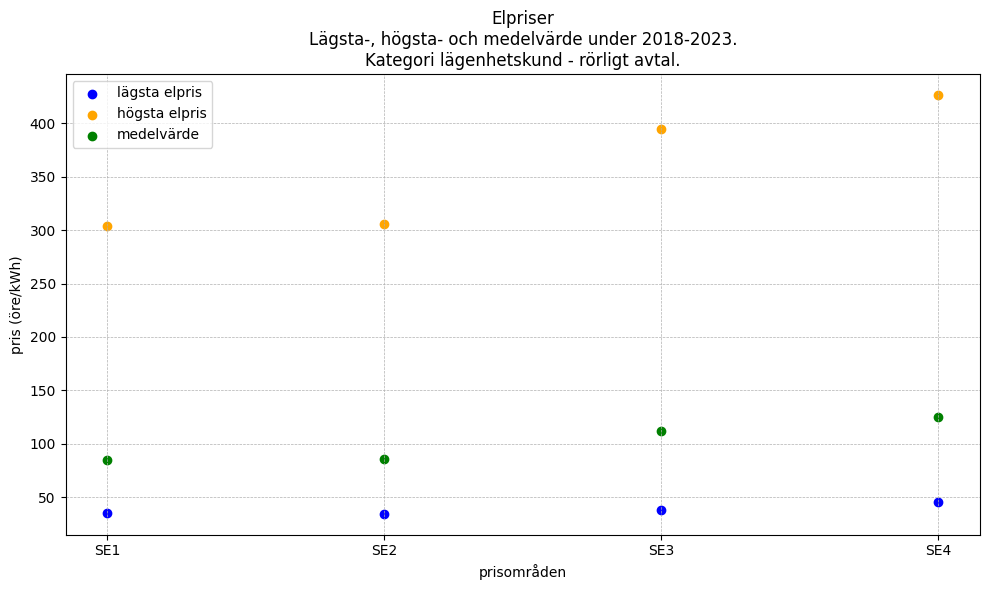

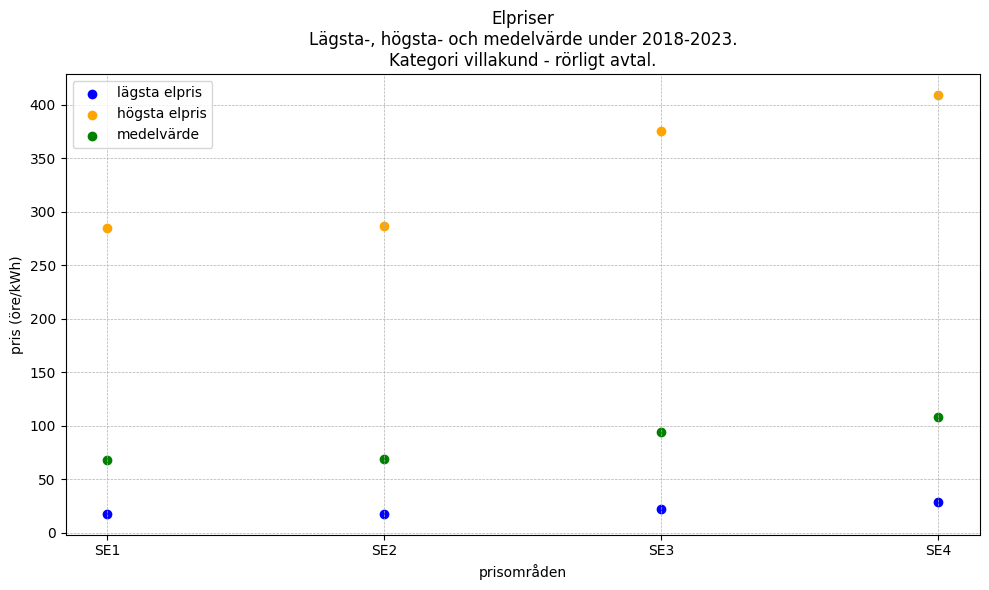

In [91]:
#Hämtar datan
lghData = read_file("lghpriser.csv")
villaData = read_file("villapriser.csv")

#Funktion för att plotta diagrammet.
def plot_diagram(customer_type, prisavtal_str, min_max_avg_list):
        #Definerar x-värden
        SE_X_strings = ["SE1", "SE2", "SE3", "SE4"]

        plt.figure(figsize=(10, 6))
        #Plottar med rätt data.
        plt.scatter(SE_X_strings, min_max_avg_list[0], color="blue", label="lägsta elpris")
        plt.scatter(SE_X_strings, min_max_avg_list[1], color="orange", label="högsta elpris")
        plt.scatter(SE_X_strings, min_max_avg_list[2], color="green", label="medelvärde")
        #Skriver in rätt rubrik
        plt.title(f"Elpriser\nLägsta-, högsta- och medelvärde under 2018-2023.\nKategori {customer_type} - {prisavtal_str}")
        plt.xlabel("prisområden")
        plt.ylabel("pris (öre/kWh)")
        plt.legend(loc="upper left")
        plt.grid(True, which="both", linestyle="--", linewidth=0.5)
        plt.tight_layout()
        plt.show()


def main_deluppgift5 ():
    #Hämtar kund input
    prisavtal = get_prisavtal()
    
    #Definerar mappning av möjliga val
    prisavtalSTR_mapping = {
        "F1": "fast avtal - 1år.",
        "F3": "fast avtal - 3år.",
        "R" : "rörligt avtal."
    }

    #Sätter det som ska skrivas ut i rubriken till prisavtal_str
    prisavtal_str = prisavtalSTR_mapping.get(prisavtal)

    #Definerar mappning av möjliga val
    column_mapping = {
        "F1": (2, 5, 8, 11),
        "F3": (3, 6, 9, 12),
        "R" : (4, 7, 10, 13)
    }

    #Sätter rätt column_index_list till de rätta kolumn indexet beroende på val
    column_index_list = column_mapping.get(prisavtal)

    #Skapar två listor för att spara värdena inuti
    min_max_SE1_4_lgh = []
    avrage_list_lgh = []
    #Använder mina tidigare gjorda funktioner för att spara min, max och medelvärde
    for index in column_index_list:
        min_max_SE1_4_lgh.append(get_min_max_value(index, lghData[1:]))
        avrage_list_lgh.append(calculate_avg(index, lghData[1:]))

    #Gör samma sak nedan fast för villakund
    min_max_SE1_4_villa = []
    avrage_list_villa = []
    for index in column_index_list:
        min_max_SE1_4_villa.append(get_min_max_value(index, villaData[1:]))
        avrage_list_villa.append(calculate_avg(index, villaData[1:]))

    print("==========================================================================================")
    print("                      Lägsta-, högsta- och medelvärde av elpriserna.")
    print(f"                     under tidsperioden 2018-2023 för {prisavtal_str}")
    print("")
    print("Prisomr.    lägsta        år        mån          högsta        år        mån       medel  ")
    print("------------------------------------------------------------------------------------------")
    print("Kategori lägenhetskund:")
    #Printar ut resultaten med hjälp av en for loop som ittererar listan för min/max
    for index, value in enumerate(min_max_SE1_4_lgh):
        #       Prisomr.                lägsta                    år               mån                   högsta                   år                   mån                  medel"
        print(f"SE{index + 1}        {value[0][0]:<5}        {value[2][0]}        {value[1][0]}          {value[0][1]:<5}        {value[2][1]}      {value[1][1]}       {avrage_list_lgh[index]}")
    print("Kategori villakund:")
    for index, value in enumerate(min_max_SE1_4_villa):
        #       Prisomr.                lägsta                    år               mån                   högsta                   år                   mån                  medel"
        print(f"SE{index + 1}        {value[0][0]:<5}        {value[2][0]}        {value[1][0]}          {value[0][1]:<5}        {value[2][1]}      {value[1][1]}       {avrage_list_villa[index]}")
    print("==========================================================================================")
    
    #Tar ut endast värdena för min och max
    min_values_lgh = []
    max_values_lgh = []
    for value in min_max_SE1_4_lgh:
        min_values_lgh.append(value[0][0])
        max_values_lgh.append(value[0][1])

    #Tar ut endast värdena för min och max
    min_values_villa = []
    max_values_villa = []
    for value in min_max_SE1_4_villa:
        min_values_villa.append(value[0][0])
        max_values_villa.append(value[0][1])

    #Lägger alla värden i en två dimensionell lista för att slipa hantera så mycket variablar
    min_max_avg_list_lgh = [min_values_lgh, max_values_lgh, avrage_list_lgh]
    min_max_avg_list_villa = [min_values_villa, max_values_villa, avrage_list_villa]

    #Plottar diagrammet med funktionen i början av uppgiften.
    plot_diagram("lägenhetskund", prisavtal_str, min_max_avg_list_lgh)
    plot_diagram("villakund", prisavtal_str, min_max_avg_list_villa)


    
main_deluppgift5()